importing necessary libraries,we will be importing more libraries later

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dataset can be downloaded from 
url=https://www.kaggle.com/c/digit-recognizer/data?select=train.csv



In [6]:
dataset=pd.read_csv(r"C:\Users\User\Desktop\traindigit.csv")
dataset.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
dataset.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

we can see there are no empty cells.
we will seperate the dataset to labels and features and further convert them to numpy array using .values attribute.

In [9]:
label=dataset.iloc[:,0].values 
feature=dataset.iloc[:,1:].values
feature.shape

(42000, 784)

#building a classifier
we will be using RandomForrest Classifier to classify the features with 6 no of estimators or trees


In [10]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
classifier=RandomForestClassifier(n_estimators=6)
classifier.fit(feature,label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

We will be writing down our digit with the help of following code and then try to guess it

In [22]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *
 
width = 200
height = 200
center = height//2
white = (255, 255, 255)
green = (0,128,0)
 
def save():
    filename = "image.png"
    image1.save(filename)
 
def paint(event):
    # python_green = "#476042"
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    cv.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="black",width=5)
 
root = Tk()
 
# Tkinter create a canvas to draw on
cv = Canvas(root, width=width, height=height, bg='white')
cv.pack()
 
# PIL create an empty image and draw object to draw on
# memory only, not visible
image1 = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(image1)
 
# do the Tkinter canvas drawings (visible)
# cv.create_line([0, center, width, center], fill='green')
 
cv.pack(expand=YES, fill=BOTH)
cv.bind("<B1-Motion>", paint)
 
# do the PIL image/draw (in memory) drawings
# draw.line([0, center, width, center], green)
 
# PIL image can be saved as .png .jpg .gif or .bmp file (among others)
# filename = "my_drawing.png"
# image1.save(filename)
button=Button(text="save",command=save)
button.pack()
root.mainloop()

with the hep of cv2 we'll read our written image

In [23]:
import cv2
im="image.png"
v=cv2.imread(im,0)
print(v.shape)

(200, 200)


our handritten image is a (200,200) matrix that is 40000 pixel coordinates so we will need to resize it so that it matches with our features matrix

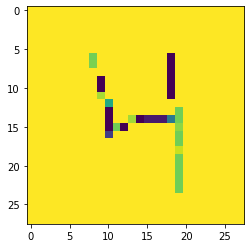

In [24]:
v=cv2.resize(v,(28,28))
plt.imshow(v)





In [25]:
#to convert in in 784 features
v=v.reshape(1,784)
print(v)


[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 200 255 255 255
  255 255 255 255 255 255   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 204 255 255 255 255 255 255 255 255 255   0 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255   0 

In [27]:
for i in range(0,len(v)):
    v[i]=255-v[i]

In [28]:
print(v)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0  55   0   0   0
    0   0   0   0   0   0 255   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0  51   0   0   0   0   0   0   0   0   0 255   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0 255 

In [29]:
y=classifier.predict(v)
print(y)

[4]


we have successfully predicted our handwritten digits